In [2]:
import tensorflow as tf

In [4]:
mnist  = tf.keras.datasets.mnist # mnist is the dataset which contains handwritten digits

After loading the MNIST data, Divide into train and test datasets. 
MNIST constains training samples = 60,000 , Testing samples = 10,000


In [5]:
#unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train = data and y_train = lable

In [6]:
x_train.shape

(60000, 28, 28)

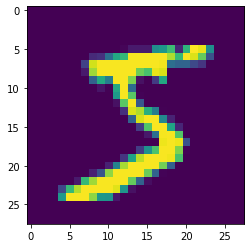

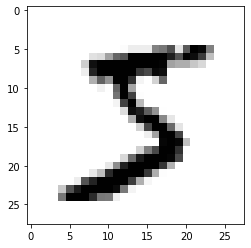

In [7]:
# checking the graph , how data look like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() 
# however we dont know whether its color image or binary image
# so we converted it into binary image
plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.cm.binary converts the pixel from balck to white and white to black but we not need it

In [8]:
print(x_train[0]) # 255 is white and 0 is black

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

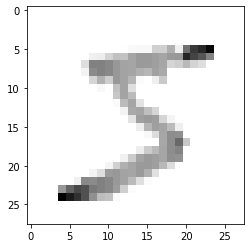

In [9]:
# digits varry from 0 to 255 so we have to normalize it
# all values divided by 255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[0])

5


Resizing image to make it suitable to apply Convolution operation

In [12]:
import numpy as np
IMG_SIZE=28
# -1 corresponds to 60,000
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE , 1)  # incresing one dimension for kernel operatin
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # incresing one dimension for kernel operation 
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
#### Training on 60,000 samples of MNIST handwritten dataset

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
# Creating  a neural network
model = Sequential()

#First Convolution Layer   26*26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ## only for first convolution layer to mention input layer size
model.add(Activation("relu")) # activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2))) # maxpooling single maximum value of 2x2


#Second Convolution Layer  13*13
model.add(Conv2D(64, (3,3))) ##
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#Third Convolution Layer  24-3+1 = 22 * 22
model.add(Conv2D(64, (3,3))) ##
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully Connected layer 1 20x20 = 400
model.add(Flatten()) # before using fully connected layer, convert 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

## Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

## Last Fully Connected layer , output must be equal to number of classes
model.add(Dense(10))
model.add(Activation("softmax"))



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 66s 48ms/step - loss: 0.3361 - accuracy: 0.8941 - val_loss: 0.2269 - val_accuracy: 0.9284
Epoch 2/5
1313/1313 [==============================] - 62s 47ms/step - loss: 0.1100 - accuracy: 0.9658 - val_loss: 0.1046 - val_accuracy: 0.9674
Epoch 3/5
1313/1313 [==============================] - 61s 47ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0708 - val_accuracy: 0.9778
Epoch 4/5
1313/1313 [==============================] - 61s 47ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 5/5
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0680 - val_accuracy: 0.9797


In [18]:
# Evaluating on testing data set MNIST
test_loss , test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy in 10,000 test samples", test_acc)


313/313 [==============================] - 5s 15ms/step - loss: 0.0593 - accuracy: 0.9818
Test loss on 10,000 test samples 0.05933801084756851
Validation Accuracy in 10,000 test samples 0.9818000197410583


In [19]:
prediction = model.predict([x_testr])

313/313 [==============================] - 5s 15ms/step


In [20]:
print(prediction) # actually these predictions are based on one hot encoding so there are only arrays, containing softmax probability

[[1.04382325e-08 5.34290484e-06 5.17192257e-06 ... 9.99984622e-01
  2.09269683e-06 1.55291946e-06]
 [2.29979764e-06 2.49212007e-06 9.99986053e-01 ... 7.64022116e-06
  1.41838245e-06 1.29323388e-08]
 [1.97257941e-06 9.99874949e-01 1.64928778e-07 ... 3.44994123e-06
  4.08931419e-06 1.16776641e-06]
 ...
 [1.79705417e-10 1.84145819e-07 1.28575084e-09 ... 7.19840159e-07
  1.47449134e-06 4.35748461e-06]
 [3.58161003e-08 6.82858159e-10 3.51899865e-09 ... 1.89821173e-10
  5.88168496e-06 2.76819740e-08]
 [6.07575157e-06 8.21030977e-09 5.79741209e-06 ... 1.16993937e-09
  4.71643725e-04 6.95068366e-07]]


In [21]:
print(np.argmax(prediction[0]))

7


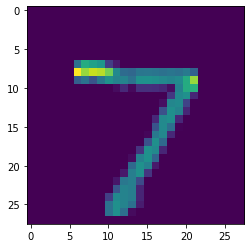

In [22]:
plt.imshow(x_test[0])

In [23]:
# for checking image from our computer
import cv2

In [24]:
img = cv2.imread("four.png")

In [25]:
img.shape

(1660, 1700, 3)

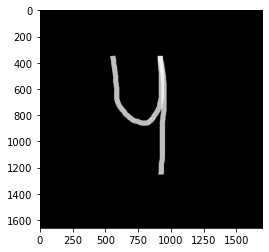

In [26]:
plt.imshow(img)

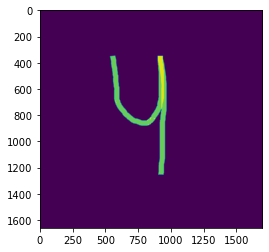

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [28]:
gray.shape

(1660, 1700)

In [29]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [30]:
resized.shape

(28, 28)

In [31]:
newing = tf.keras.utils.normalize(resized, axis = 1) ## 0 to 1 scaling

In [32]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [33]:
newing.shape

(1, 28, 28, 1)

In [34]:
prediction =  model.predict(newing)

1/1 [==============================] - 0s 261ms/step


In [35]:
print(np.argmax(prediction))

4


In [37]:
# For video
import numpy as np
import cv2
cap = cv2.VideoCapture("Video2.mp4")
font = cv2.FONT_HERSHEY_PLAIN
(text_width, text_height) = cv2.getTextSize("Some text in a box!", font, fontScale = 1.5, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2 , text_offset_y - text_height - 2))

cntr=0
while True:
    ret, frame = cap.read()
    cntr = cntr+1
    
    if ret == False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newing = tf.keras.utils.normalize(resized, axis=1)
    newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(newing)
    status = np.argmax(prediction)

    print(status)
    print(type(status))

    x1, y1,w1,h1=0,0,175,75
    cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,255,0), -1)
    cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    cv2.imshow("Digit recognization", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

    

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 44ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 57ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 66ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 65ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 63ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 76ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 67ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 120ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 68ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 64ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 74ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 64ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 23ms/step
1
<class 'numpy.int64'>
1/1 [======